# Exploring Audio in Digital Form using Python
This project demonstrates how to process and visualize audio data in digital form using Python libraries such as `librosa`, `pandas`, and `matplotlib`. It covers key audio concepts, including frequency, intensity, and sample rate. We explore various techniques such as raw audio plotting, trimming, and advanced visualizations like spectrograms and mel spectrograms.

![Audio Visualizations](./assets/audio.jpg)

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


## Terms to know for Audio in Digital Form:
### Frequency (Hz)
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

### Intensity (db / power)
- Intensity describes the amplitude (height) of the wave.

### Sample Rate
- Sample rate in specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.

## Reading in Audio Files
There are many types of audio files: `mp4`, `wav`, `m4a`, `flac`, `ogg`

In [5]:
audio_files = glob("Data/*/*.wav")

In [6]:
# Play audio file
ipd.Audio(audio_files[0])

In [7]:
y, sr = librosa.load(audio_files[0])
print(f"y: {y[:10]}")
print(f"shape y: {y.shape}")
print(f"sr: {sr}")

y: [ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07]
shape y: (72838,)
sr: 22050


## Plotting Raw Audio

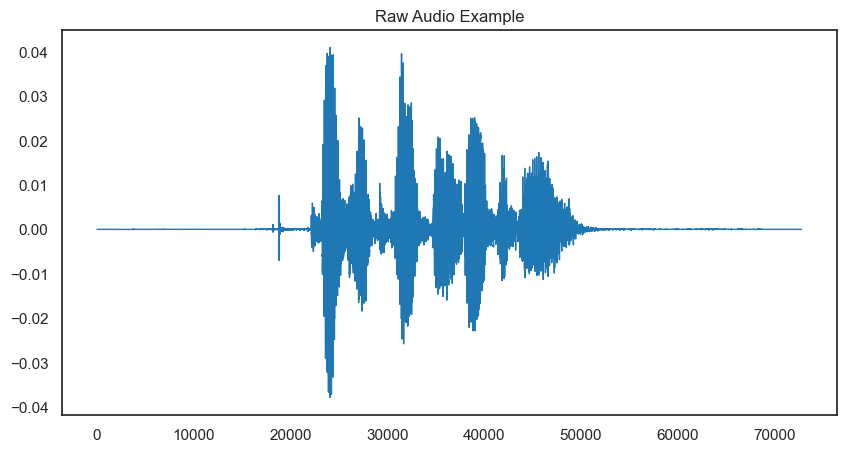

In [8]:
pd.Series(y).plot(figsize=(10,5), lw=1, title="Raw Audio Example",
                   color=color_pal[0] )
plt.show()

## Trimming Silence

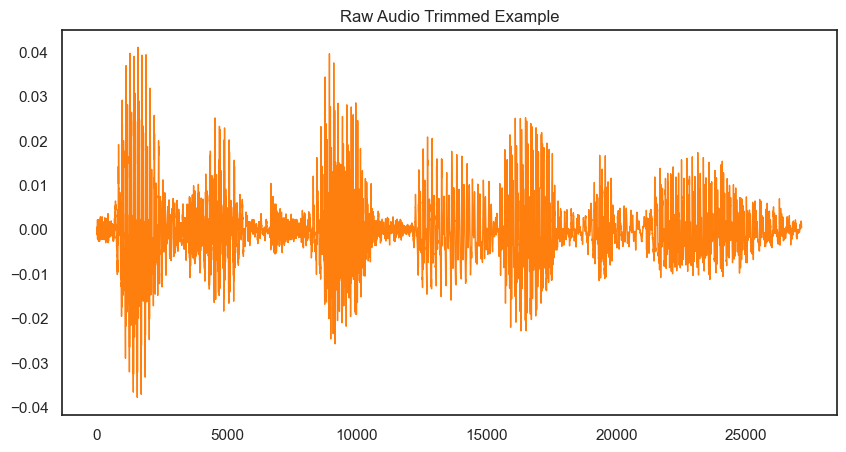

In [9]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="Raw Audio Trimmed Example",
                   color=color_pal[1] )
plt.show()

## Zoomed-In Audio

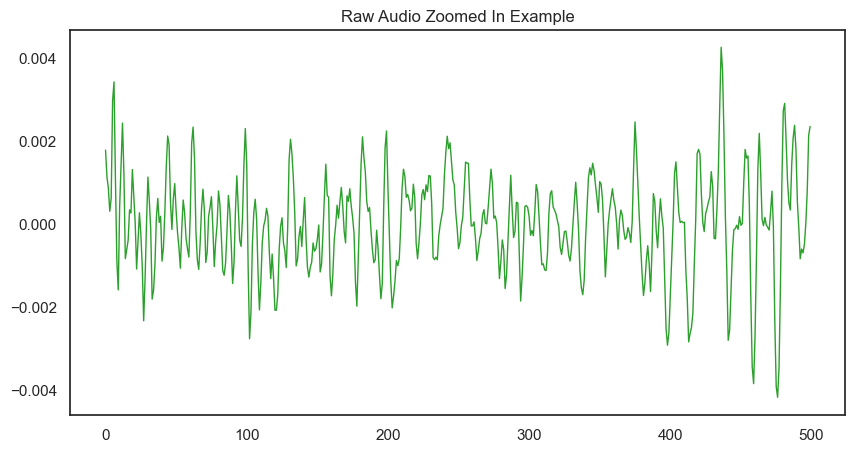

In [10]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
            lw=1,
            title="Raw Audio Zoomed In Example",
            color=color_pal[2])
plt.show()

## Spectrogram

In [11]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 143)

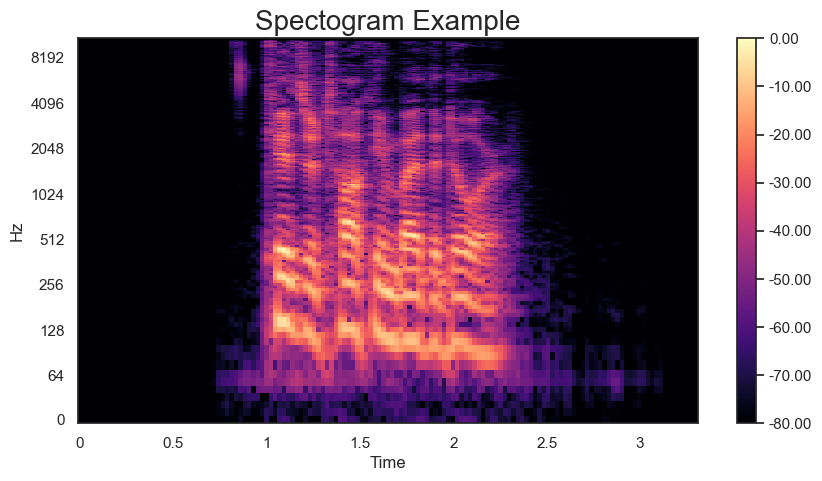

In [12]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                                x_axis="time",
                                y_axis="log",
                                ax=ax)
ax.set_title("Spectogram Example", fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Mel Spectrogram

In [13]:
S = librosa.feature.melspectrogram(y=y,
                                sr=sr,
                                n_mels=128,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

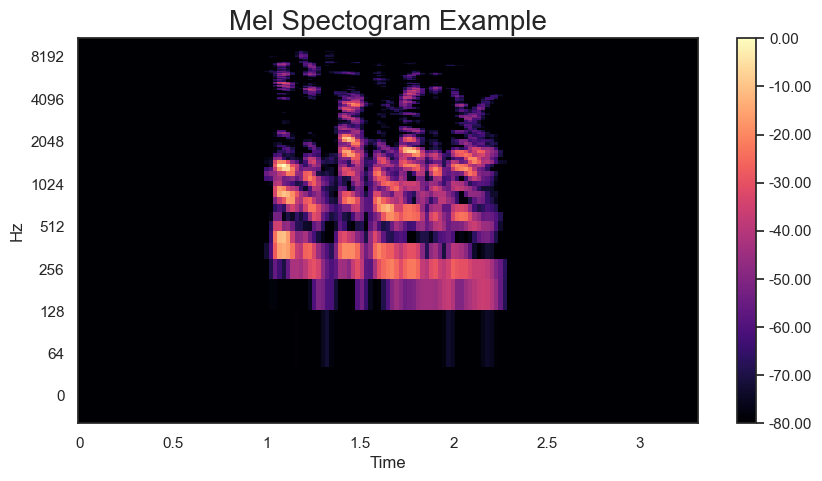

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                                x_axis="time",
                                y_axis="log",
                                ax=ax)
ax.set_title("Mel Spectogram Example", fontsize=20)
fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()

## Conclusion
The mel spectrogram focuses on human perception of pitch by converting the frequencies to the mel scale, providing a more intuitive representation of the sound's timbre.